# Bar Chart Examples

Plot bar charts per requirements laid out at [The Data Visualization Catalogue Blog](https://datavizcatalogue.com/blog/new-format-for-the-bar-chart-reference-page/)

## Plot a Dictionary with a Predefined Formatter

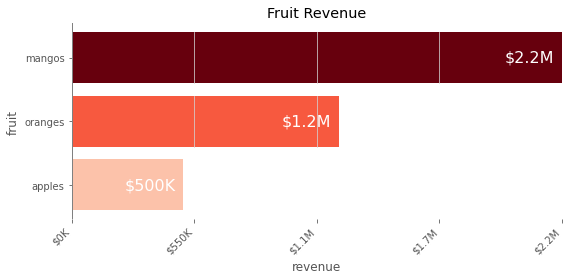

In [2]:
from idealforms.bar import bar
from idealforms.formatters import money_formatter

categorical_data = dict(apples=500000,
                        oranges=1200000,
                        mangos=2200005)

fig, ax = bar(categorical_data,
              x_label='revenue',
              y_label='fruit',
              title='Fruit Revenue',
              formatter=money_formatter)

## Order by category name, plot values outside bars

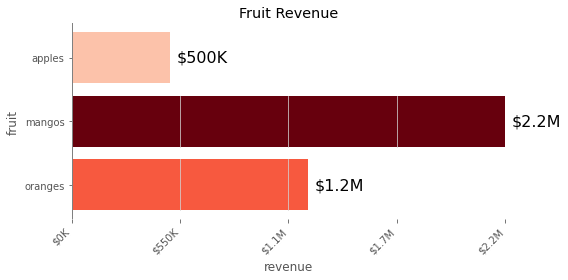

In [3]:
categorical_data = dict(apples=500000,
                        oranges=1200000,
                        mangos=2200005)

fig, ax = bar(categorical_data,
              x_label='revenue',
              y_label='fruit',
              title='Fruit Revenue',
              sort='alpha',
              in_bar_labels=False,
              formatter=money_formatter)

# Plot Data Dictionary from API Request and Use a Custom Formatter

In [4]:
from dotenv import find_dotenv, load_dotenv
import os
import requests
from typing import Union, Optional

def get_vax_data(cbsa: str, API_KEY: str) -> Union[dict, None]:
    """fetch vaccine data from https://covidactnow.org/data-api per cbsa code"""
    request_string = 'https://api.covidactnow.org/v2/cbsa/' + cbsa + '.json?apiKey=' + API_KEY
    r = requests.get(request_string)
    if r.status_code != 200:
        print(f'things seem non-normal: {r.status_code=}')
        return None
    response_json = r.json()
    population = int(response_json['population'])
    one_shot = int(response_json['actuals']['vaccinationsInitiated'])
    two_shots = int(response_json['actuals']['vaccinationsCompleted'])

    return {'population': population,
            'at least one shot': one_shot,
            'fully vaccinated': two_shots,
            'un-vaccinated': population - one_shot
            }

def my_formatter(x: float, pos: Optional[float]) -> str:
    """return values as hundreds of thousands"""
    return '{:1.1f}'.format(x*1e-5)

In [5]:
# load API KEY for Covid Act Now API from .env file, set params, get data
load_dotenv(find_dotenv())
API_KEY = os.environ.get("API_KEY")
madison_cbsa_code = '31540'
vax_data = get_vax_data(madison_cbsa_code, API_KEY)

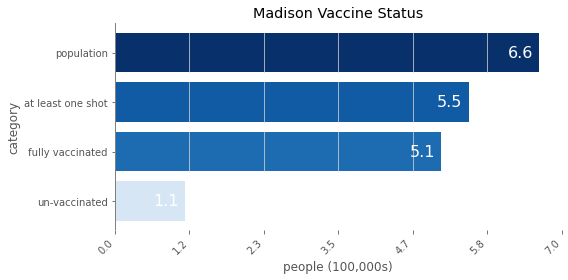

In [6]:
fig, ax = bar(vax_data,
              x_label = 'people (100,000s)',
              y_label = 'category',
              title = 'Madison Vaccine Status',
              axis_limit = 700000,
              sort = 'values',
              tick_count = 7,
              cmap_name = 'Blues',
              formatter= my_formatter)